# Tutorial Part 1: EDA for Beginners

Welcome to Part 1 of this Tutorial Series. In this series I will walk through different phases of the competition process, from EDA, to model building, model iteration, and beyond. I hope this series provides beginners some useful tools and  the confidence to progress in the space. 

Feel free to build off the code provided in these tutorials. Also, be sure to leave comments if you have any questions or if you have suggestions on how to improve the notebooks for others. If there is any code you would like help on, or model architectures you would like to see explored in future notebooks, be sure to let me know in the comments.

**In this notebook you'll learn how to:**
* Access the competition data
* Display the .csv metadata for the competition
* Visualize key characteristics of the .csv data
* Build a simple function to display .jpg competition images
* Analyze your findings
* Create a plan for model building

**Definition**: Exploratory Data Analysis (EDA) is the process of investigating key characteristics of datasets at the start of any project involving data. Before you can go on to build fancy machine learning models you've got to understand the basics of the dataset you're working with and the problem you're trying to solve. This involves loading in the data and visualizing it in the form of tables, charts, and sometimes images themselves.

**Tutorials so far:**
1. **In [Tutorial Part 1: EDA for Beginners](https://www.kaggle.com/alexteboul/tutorial-part-1-eda-for-beginners)**, we covered the exploratory data analysis process from start to finish for the PetFinder.my Pawpularity Contest.
2. **In [Tutorial Part 2: Model Building using the Metadata](https://www.kaggle.com/alexteboul/tutorial-part-2-model-building-using-the-metadata)**, we built models using the metadata (.csv data) provided by the competition hosts. Specifically, we tried Decision Tree Classification, Decision Tree Regression, Ordinary Least Squares Regression, Ridge Regression, Bernoulli Naive Bayes Classification, Random Forest Regression, and Histogram-based Gradient Boosting Regression (LightGBM). RMSE 20.54
3. **In [Tutorial Part 3: CNN Image Models 1](https://www.kaggle.com/alexteboul/tutorial-part-3-cnn-image-modeling-1)**, we explored preprocessing the training images, explaining the data types necessary to model with images, a basic Convolutional Neural Network architecture, and submitting predictions. 

## Step 1: Load in your packages
To help with the readability of your notebooks, it is helpful to have all of your packages loaded in at the top of your notebook. As you go through and find that you need more packages to accomplish what you want, go back to this first cell block, write in the code to import each new package, and re-run the cell. Then get back to coding.

In [1]:
#load in packages
import os
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Step 2: Where is the data?
This code block is an example of a for loop that walks through the directory for this competition and prints out all the file names. This is a lot of files though, so it's a good opportunity to show of %%capture. This hides the output of a cell block if you put it at the beginning of a cell!

Here's what the first 5 lines would look like without %%capture:
1. /kaggle/input/petfinder-pawpularity-score/sample_submission.csv
2. /kaggle/input/petfinder-pawpularity-score/train.csv
3. /kaggle/input/petfinder-pawpularity-score/test.csv
4. /kaggle/input/petfinder-pawpularity-score/test/c978013571258ed6d4637f6e8cc9d6a3.jpg
5. /kaggle/input/petfinder-pawpularity-score/test/4e429cead1848a298432a0acad014c9d.jpg

In [2]:
%%capture
#%%capture hides the output of this from being printed. 
#Try removing it to see what happens!

#this for loop goes through the directory and prints out all the filenames. 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Step 3: Get the data
First thing you generally want to do when working with data is create variable names that are user friendly and relevant. Basically, you need to get the data stored in a way you can use it later on and is easy to understand.

1. The pd.read_csv() function from the pandas package can be used to import a .csv file and store it in what is known as a DataFrame. This makes it easy to work with. When people name things df it's short for DataFrame.
2. The glob() module will take all the filenames in a directory and put them into a list. If you put /*.jpg it will select only the .jpg files. It's useful to have the filenames in a list to perform element-wise operations on the images.


In [3]:
#source path (where the Pawpularity contest data resides)
path = '../input/petfinder-pawpularity-score/'

#Get the metadata (the .csv data) and put it into DataFrames
train_df = pd.read_csv(path + 'train.csv')
test_df = pd.read_csv(path + 'test.csv')

#Get the image data (the .jpg data) and put it into lists of filenames
train_jpg = glob(path + "train/*.jpg")
test_jpg = glob(path + "test/*.jpg")

Below, you can print the .shape of the train_df and test_df DataFrames. Note that the train_df has 9912 rows and 14 columns, while the test_df only has 8 rows and 13 columns.  Also note that the test_df dataframe does not have the pawpularity score. Calling .column.values.tolist() allows you to see the column names in list form. 

In [4]:
#show the dimensions of the train metadata.
print('train_df dimensions: ', train_df.shape)
print('train_df column names: ', train_df.columns.values.tolist())

#print an extra row could use '\n' as well in a print statement
print('')

#show the dimensions of the test metadata
print('test_df dimensions: ',test_df.shape)
print('test_df column names: ', test_df.columns.values.tolist())

train_df dimensions:  (9912, 14)
train_df column names:  ['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur', 'Pawpularity']

test_df dimensions:  (8, 13)
test_df column names:  ['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']


Now let's look at the image data. When we used glob earlier, we really just got lists of filenames:

In [5]:
#show the type of train_jpg and test_jpg as well as length of the list.
print('train_jpg is of type ',type(train_jpg), ' and length ', len(train_jpg))
#Also show the first 3 elements
print('train_jpg list 1st 3 elements: ', train_jpg[0:3], '\n')

print('test_jpg is of type ',type(test_jpg), ' and length ', len(test_jpg))
#Also show the first 3 elements
print('test_jpg list 1st 3 elements: ', test_jpg[0:3])

train_jpg is of type  <class 'list'>  and length  9912
train_jpg list 1st 3 elements:  ['../input/petfinder-pawpularity-score/train/7954ebb5c90d9618e34959df0ad5f062.jpg', '../input/petfinder-pawpularity-score/train/2969162fab1d0e5a65e4ce02db267745.jpg', '../input/petfinder-pawpularity-score/train/9f32ae94d7723414cb8fa881a1c6626c.jpg'] 

test_jpg is of type  <class 'list'>  and length  8
test_jpg list 1st 3 elements:  ['../input/petfinder-pawpularity-score/test/c978013571258ed6d4637f6e8cc9d6a3.jpg', '../input/petfinder-pawpularity-score/test/4e429cead1848a298432a0acad014c9d.jpg', '../input/petfinder-pawpularity-score/test/43a2262d7738e3d420d453815151079e.jpg']


## Step 4: Explore the metadata in train_df
The photo metadata refers to the .csv table data provided in this competition that has information about the subject focus, eyes, face, group etc. Let's explore this data first now that we've loaded the data into DataFrames. For now, ignore the test_df dataframe. When you build your models, it will be using the training data. The test_df doesn't have a pawpularity score, so that's really just to practice using some data for when you finally submit your predictions for the competition.

In [6]:
#show the first 5 rows of the train_df dataframe
train_df.head()
#train_df.head(10) #this would show 10 rows instead. 5 is the default

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63  
1          0      0        0      0          0     0     0           42  
2          0      0        0      1          1     0     0           28  
3          0      0        0      0          0     0     0           15  
4          0      1        0      0          0     0     0           72

Note that the dataframe still contains the Id's of the photos. You won't be using this when you build your models.

It's also useful to first see the distribution of your target variable when you first start analyzing a dataset. In our case, that is the Pawpularity score, which is in the range of 1-100. One way to do this is with a simple histogram. 

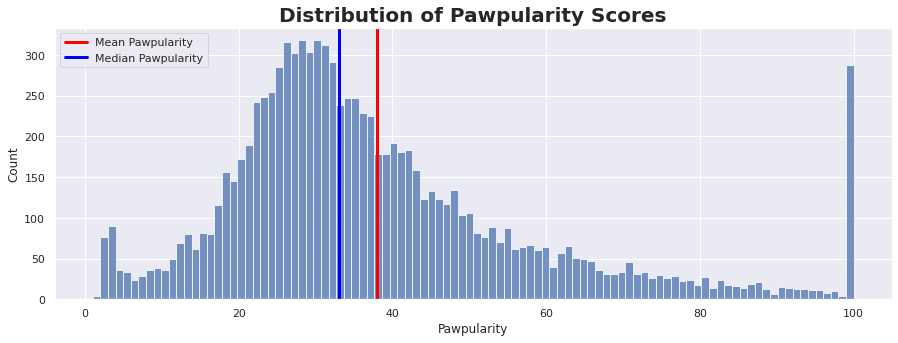

In [7]:
#Lets see a the distribution of Pawpularity Scores
sns.set(rc={'figure.figsize':(15,5)})
fig = plt.figure()
sns.histplot(data=train_df, x='Pawpularity', bins=100)
plt.axvline(train_df['Pawpularity'].mean(), c='red', ls='-', lw=3, label='Mean Pawpularity')
plt.axvline(train_df['Pawpularity'].median(),c='blue',ls='-',lw=3, label='Median Pawpularity')
plt.title('Distribution of Pawpularity Scores', fontsize=20, fontweight='bold')
plt.legend()
plt.show()

Looking at this histogram, note the skew in the distribution of the pawpularity scores. Interesting there is a small curve close to zero Pawpularity as well. Also, note the close to 300 pawpularity scores at 100! Start thinking about why this might be. 
* Is there something unique about these animals? 
* Is there a particular breed, color, age of animal that is most desirable by the people visiting the site?
* Is there something about the way the photos were taken that is leading to more clicks and thus a higher Pawpularity score?
* Does this have do to with the Pawpularity score itself? 
* Are these outliers that need to be removed from the training data to improve the models you will build?

Keep these types of questions in mind as you go about solving this problem.

In [8]:
#Calling .describe() lets you see the distribution in a numerical way
train_df[['Pawpularity']].describe()

Pawpularity
count  9912.000000
mean     38.039044
std      20.591990
min       1.000000
25%      25.000000
50%      33.000000
75%      46.000000
max     100.000000

Not much point in doing this for the feature variables because they're all just 0s and 1s. No reason the std, mean, quartiles, etc would be helpful. But if you wanted to see it, you would just call train_df.describe(). That would show all the columns.

### Now lets visualize the distribution of Pawpularity scores across each feature variable

To do this, we can use some simple box plots and histograms. Basically, we'll plot the Pawpularity scores on the y axes and the 0s and 1s of each feature variable on the x axes for the boxplots. For the histograms, we plot the pawpularity on the x axes and count the 0s and 1s at each Pawpularity score. This could help us visualize if 0s or 1s in each feature variable have an impact on the Pawpularity scores.

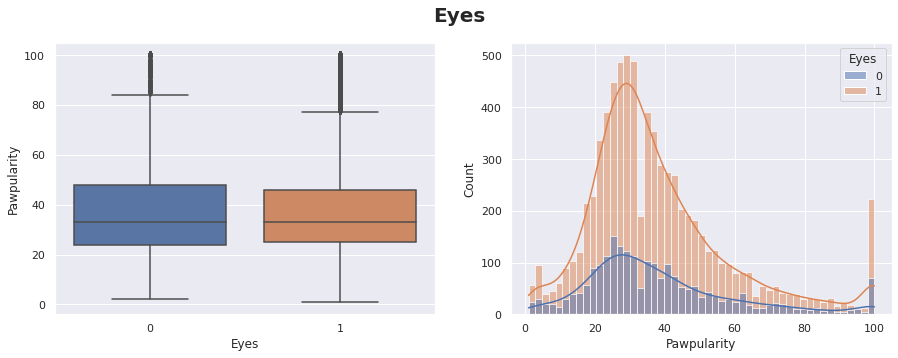

In [9]:
#Let's start with just one variable to demonstrate
fig, ax = plt.subplots(1,2)
sns.boxplot(data=train_df, x='Eyes', y='Pawpularity', ax=ax[0])
sns.histplot(train_df, x="Pawpularity", hue="Eyes", kde=True, ax=ax[1])
plt.suptitle("Eyes", fontsize=20, fontweight='bold')
fig.show()

Notice how the boxplots are almost identical? Going to be difficult for any algorithm to use this data to predict Pawpularity using this feature. With respect to the histogram, notice that there are many more 1 values than 0 values for this feature, but again distribution is very similar.

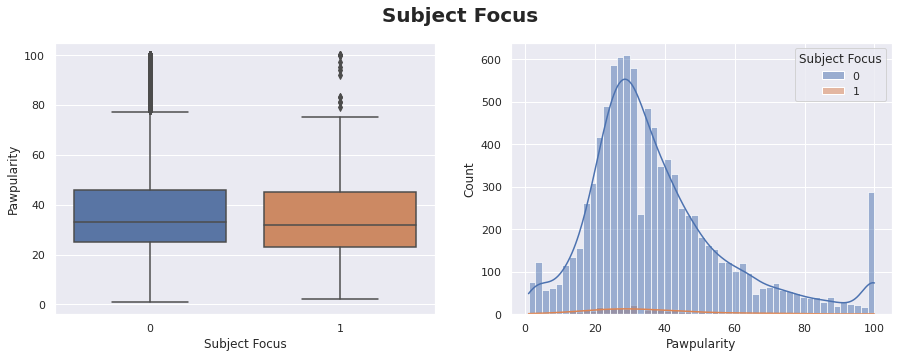

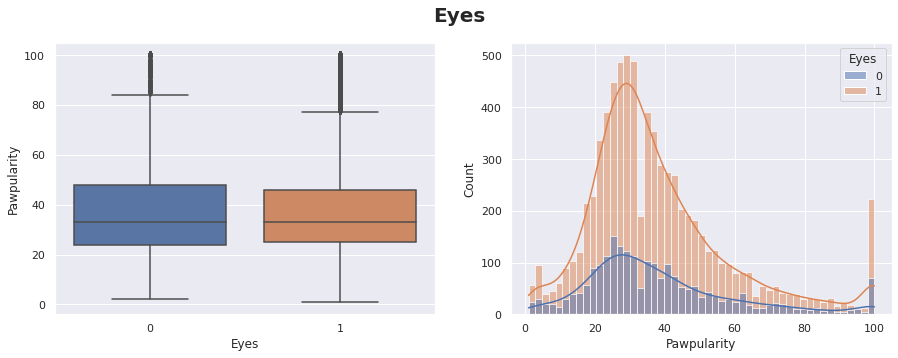

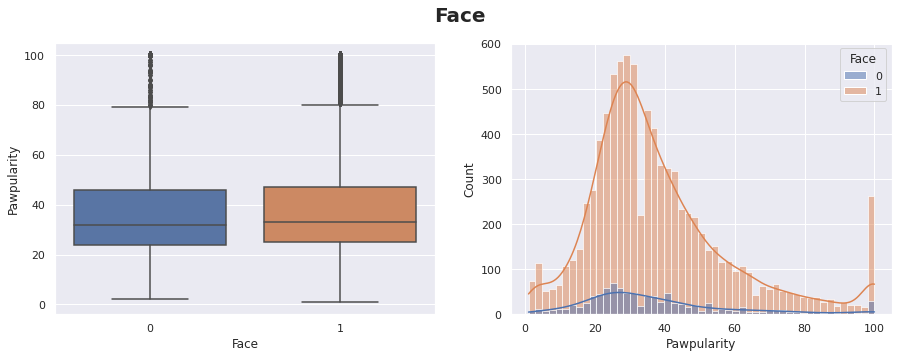

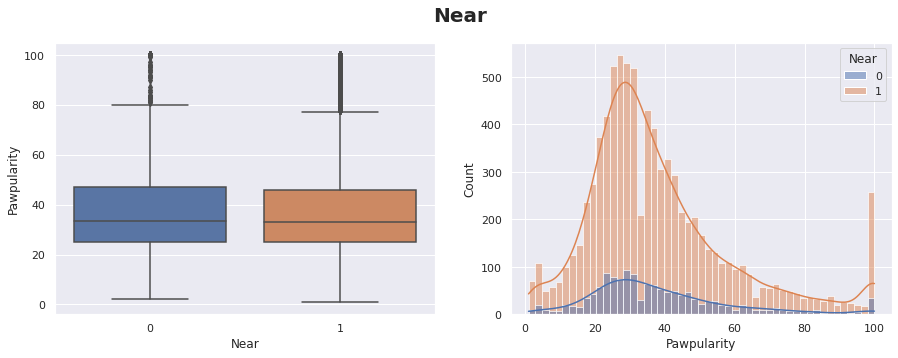

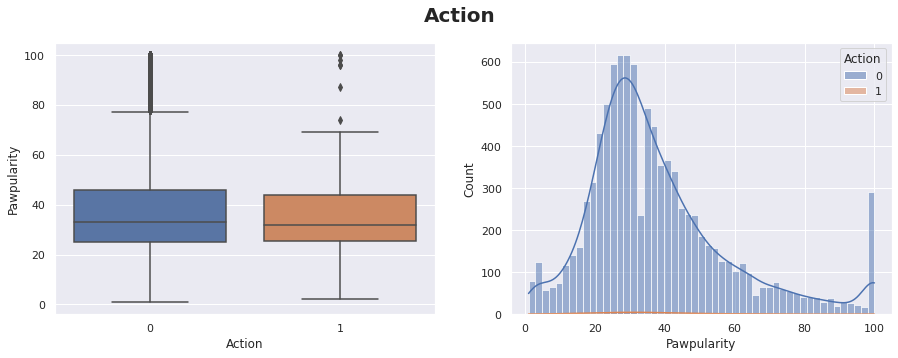

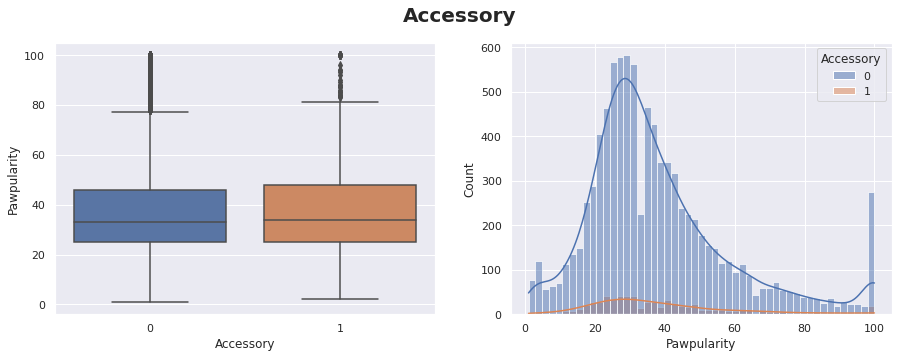

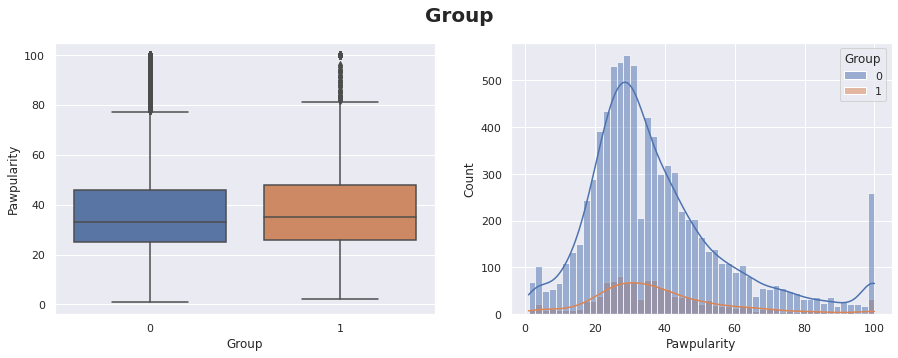

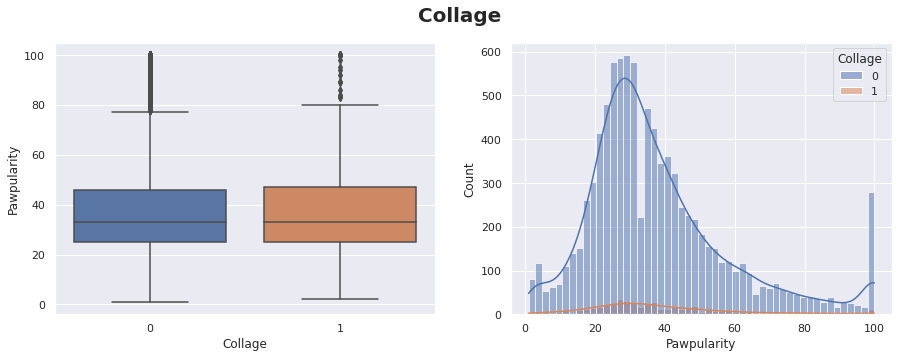

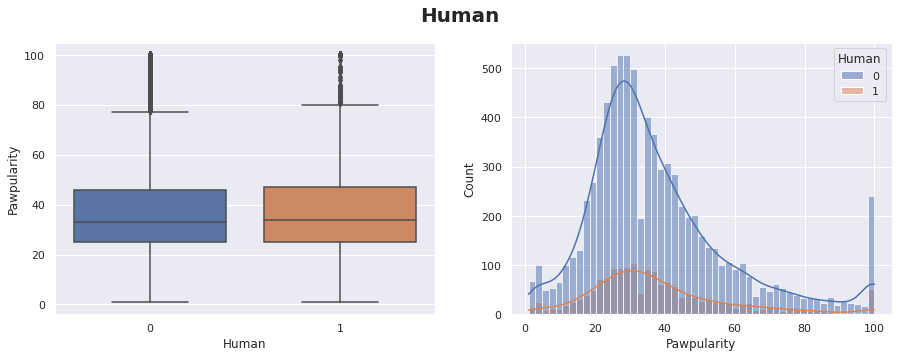

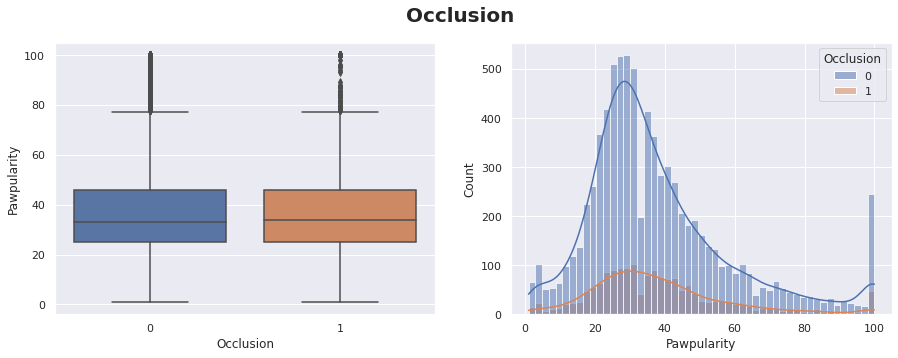

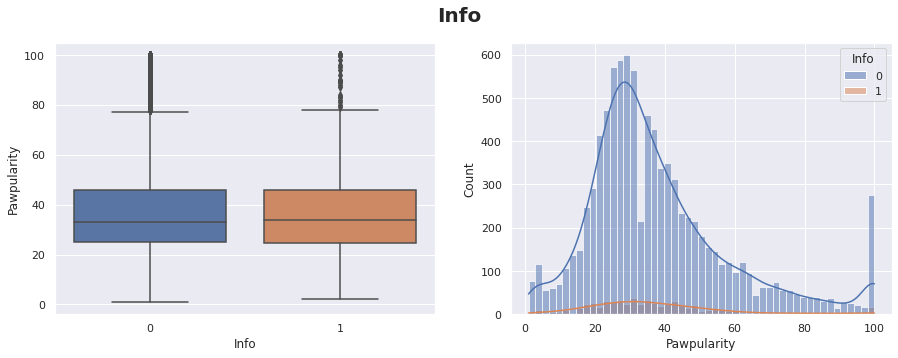

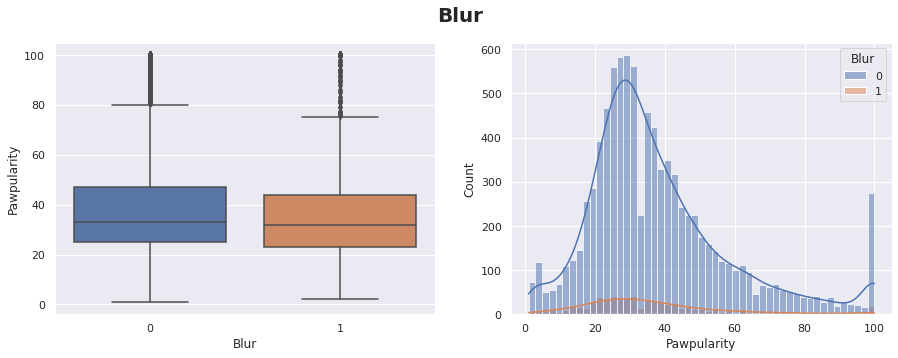

In [10]:
#Now lets do the same for all the variables with a simple for loop:

#get a the column names into a list
feature_variables = train_df.columns.values.tolist()

#for each of the feature variables, doesn't include Id and Pawpularity by using [1:-1]
#show a boxplot and distribution plot against pawpularity
for variable in feature_variables[1:-1]:
    fig, ax = plt.subplots(1,2)
    sns.boxplot(data=train_df, x=variable, y='Pawpularity', ax=ax[0])
    sns.histplot(train_df, x="Pawpularity", hue=variable, kde=True, ax=ax[1])
    plt.suptitle(variable, fontsize=20, fontweight='bold')
    fig.show()

### Quick Analysis
You can't always tell just from looking at chart if you're going to be able to build a highly predictive model, but intuition is telling me that models are not going to be great based on these charts. The reason is that the distribution of pawpularity scores is very similar for each variable and class - in other words changing the features doesn't seem to influence the pawpularity scores that much. This might mean that a competition winning solution to this problem will require using the images and not the .csv metadata provided.

## Step 5: Explore the image data

When it comes to working with image data, you have a couple of options in Python. One of the most popular computer vision and image processing packages is opencv. If you would like to use opencv instead, add "import cv2" to your import packages at the top of the notebook. For this beginner tutorial, we can accomplish everything we need to with just numpy as np and matplotlip.pyplot as plt.

In [11]:
#first, what's the first image in the train_jpg dataset.
print(train_jpg[0])

../input/petfinder-pawpularity-score/train/7954ebb5c90d9618e34959df0ad5f062.jpg


(960, 720, 3)


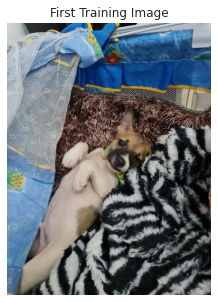

In [12]:
#let's plot that first image:

#get the image path we just printed
image_path = train_jpg[0]
#use plt.imread() to read in that image file
image_array = plt.imread(image_path) 
print(image_array.shape)

#then plt.imshow() can display it for you
plt.imshow(image_array)
plt.title('First Training Image') 
plt.axis('off') #turns off the gridlines
plt.show()

Nice! We have read in and displayed our first image! Looks like a cute dog to me. It would be better if we could see the Pawpularity score along with each image though. Let's try that next. We'll put the Pawpularity score for each image as the title. We can get this because the name of the image files is also stored in the Id column in the .csv metadata. We have this in our train_df DataFrame from earlier.

image 0's dimensions are: (960, 720, 3)


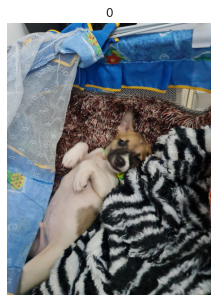

image 1's dimensions are: (720, 405, 3)


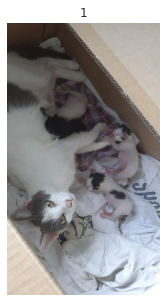

image 2's dimensions are: (514, 315, 3)


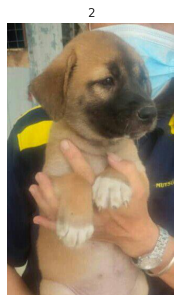

In [13]:
#first let's try printing out the first 3 images with a loop

#The for loop goes for 3 loops 
for x in range(3):
    #this loop goes through index of the train_jpg list of filenames: 0,1,2
    image_path = train_jpg[x]
    #use plt.imread() to read in that image file as an array of numbers between 0-255
    image_array = plt.imread(image_path) 
    #Let's check the image dimensions
    print("image {}'s dimensions are: {}".format(x,image_array.shape))
    #then plt.imshow() can display it for you
    plt.imshow(image_array)
    #title is the index of train_jpg
    plt.title(x) 
    #turn off gridlines
    plt.axis('off')
    #show the image
    plt.show()

Cool we've used a for loop to visualize the first 3 images and their dimensions. Notice that image 0's dimensions are: (960, 720, 3), while image 2's dimensions are: (514, 315, 3). This tells us that we need to reshape or resize the images when we end up building our models. The 3 at the end tells that this is an RGB image where each color channel has pixel values between 0-255. Try out type(image_array) to show that it is a numpy array.

Time to build on our loop to display the Pawpularity score of each associated image.

To do this, we need to get the image filenames without the directory and .jpg at the end. This will let us search the Id column in the train_df dataframe for corresponding Pawpularity scores. When you have a file path like: '../input/petfinder-pawpularity-score/train/7954ebb5c90d9618e34959df0ad5f062.jpg'and you want to get just that stem, you can use from pathlib import Path. 

In [14]:
#example of getting the stem from a filename
id_stem = Path(train_jpg[0]).stem
print('Original: ', train_jpg[0])
print('After: ', id_stem)

Original:  ../input/petfinder-pawpularity-score/train/7954ebb5c90d9618e34959df0ad5f062.jpg
After:  7954ebb5c90d9618e34959df0ad5f062


In [15]:
#get a dataframe from train_df that matches the id stem from the filename
#assume all ids/pictures are unique
id_stem_df = train_df.loc[train_df['Id'] == id_stem]
id_stem_df

Id  Subject Focus  Eyes  Face  Near  \
4719  7954ebb5c90d9618e34959df0ad5f062              0     1     1     1   

      Action  Accessory  Group  Collage  Human  Occlusion  Info  Blur  \
4719       0          0      0        0      0          0     0     0   

      Pawpularity  
4719           38

In [16]:
#the first part of this code produces a series:
id_stem_series = train_df.loc[train_df['Id'] == id_stem,'Pawpularity']
#to get the value from a pandas series use .iloc - in our case from index 0:
pawpularity_by_id = id_stem_series.iloc[0]
print('Pawpularity of id 7954ebb5c90d9618e34959df0ad5f062 : ', pawpularity_by_id)

Pawpularity of id 7954ebb5c90d9618e34959df0ad5f062 :  38


**Now let's put it all together again**

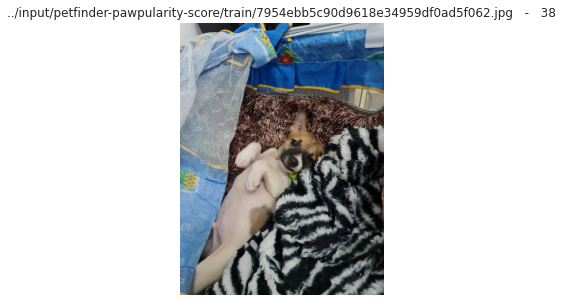

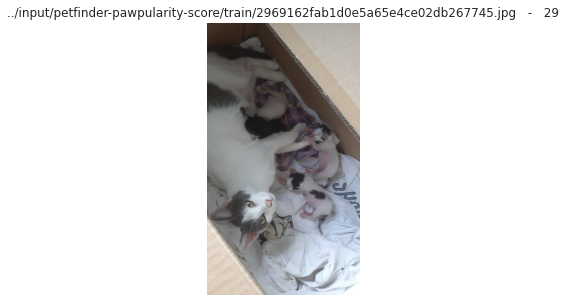

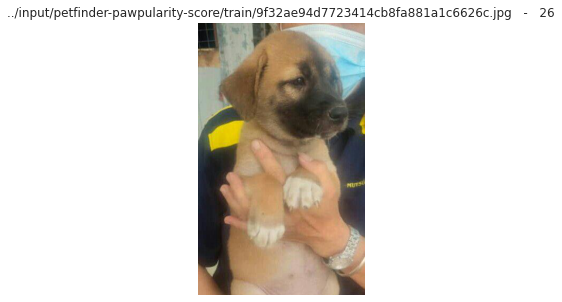

In [17]:
#The for loop goes for 3 loops 
for x in range(3):
    #this loop goes through index of the train_jpg list of filenames: 0,1,2
    image_path = train_jpg[x]
    
    #New addition to get Pawpularity by id from filename
    id_stem = Path(image_path).stem
    id_stem_series = train_df.loc[train_df['Id'] == id_stem,'Pawpularity']
    pawpularity_by_id = id_stem_series.iloc[0]
    
    #use plt.imread() to read in that image file as an array of numbers between 0-255
    image_array = plt.imread(image_path) 
    #then plt.imshow() can display it for you
    plt.imshow(image_array)
    #title is the index of train_jpg
    title = image_path + '   -   ' + str(pawpularity_by_id)
    plt.title(title) 
    #turn off gridlines
    plt.axis('off')
    #show the image
    plt.show()

Sweet, now we can see the Pawpularity score for a given image file. We pulled this information from two different places and put it together in a loop. 

**Let's do something a little different now and build a function that returns pet pictures based on given pawpularity scores.**

In [18]:
def pawpularity_pics(df, num_images, desired_pawpularity, random_state):
    '''The pawpularity_pics() function accepts 4 parameters: df is a dataframe, 
    num_images is the number of images you want displayed, desired_pawpularity 
    is the pawpularity score of pics you want to see, and random state ensures reproducibility.'''
    #how many images to display
    num_images = num_images
    #set the rample state for the sampling for reproducibility
    random_state = random_state
    
    #filter the train_df on the desired_pawpularity and use .sample() to get a sample
    random_sample = df[df["Pawpularity"] == desired_pawpularity].sample(num_images, random_state=random_state).reset_index(drop=True)
    
    #The for loop goes as many loops as specified by the num_images
    for x in range(num_images):
        #start from the id in the dataframe
        image_path_stem = random_sample.iloc[x]['Id']
        root = '../input/petfinder-pawpularity-score/train/'
        extension = '.jpg'
        image_path = root + str(image_path_stem) + extension
         
        #get the pawpularity to confirm it worked
        pawpularity_by_id = random_sample.iloc[x]['Pawpularity']
    
        #use plt.imread() to read in the image file
        image_array = plt.imread(image_path)
        #make a subplot space that is 1 down and num_images across
        plt.subplot(1, num_images, x+1)
        #title is the pawpularity score from the id
        title = pawpularity_by_id
        plt.title(title) 
        #turn off gridlines
        plt.axis('off')
        #then plt.imshow() can display it for you
        plt.imshow(image_array)
    plt.show()
    plt.close()

### Pawpularity 10

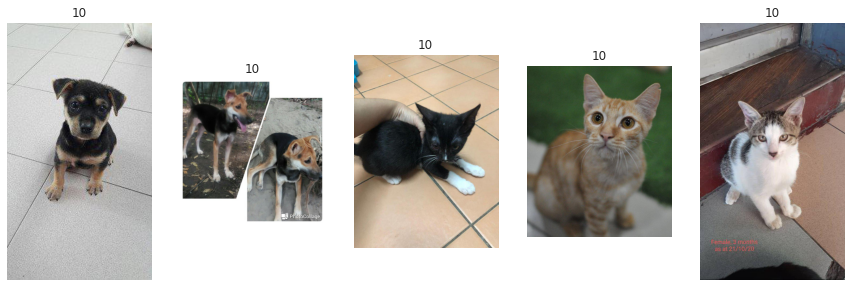

In [19]:
#Input the train_df, and ask for 5 radom images at pawpularity score 10 and random state 1
df = train_df
num_images = 5
desired_pawpularity = 10
random_state = 1
pawpularity_pics(df, num_images, desired_pawpularity, random_state)

### Pawpularity 20

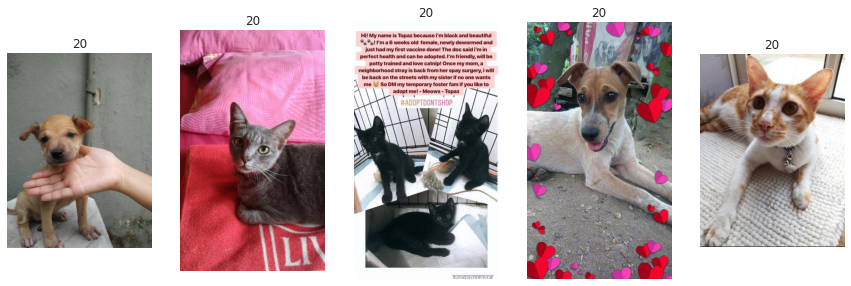

In [20]:
#Input the train_df, and ask for 5 radom images at pawpularity score 10 and random state 1
df = train_df
num_images = 5
desired_pawpularity = 20
random_state = 1
pawpularity_pics(df, num_images, desired_pawpularity, random_state)

### Pawpularity 30

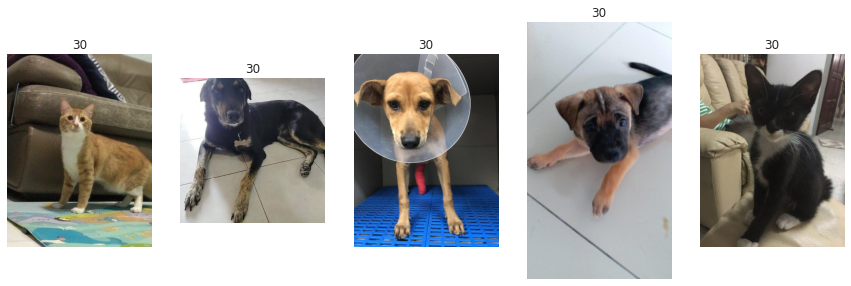

In [21]:
#Input the train_df, and ask for 5 radom images at pawpularity score 10 and random state 1
df = train_df
num_images = 5
desired_pawpularity = 30
random_state = 1
pawpularity_pics(df, num_images, desired_pawpularity, random_state)

### Pawpularity 40

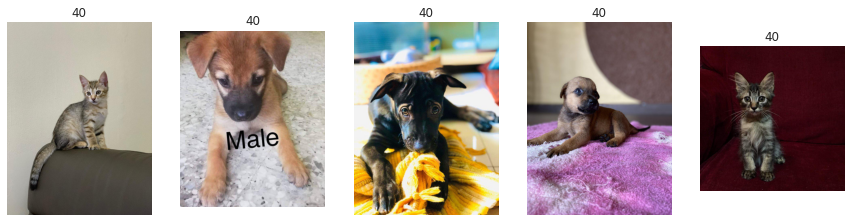

In [22]:
#Input the train_df, and ask for 5 radom images at pawpularity score 10 and random state 1
df = train_df
num_images = 5
desired_pawpularity = 40
random_state = 1
pawpularity_pics(df, num_images, desired_pawpularity, random_state)

### Pawpularity 50

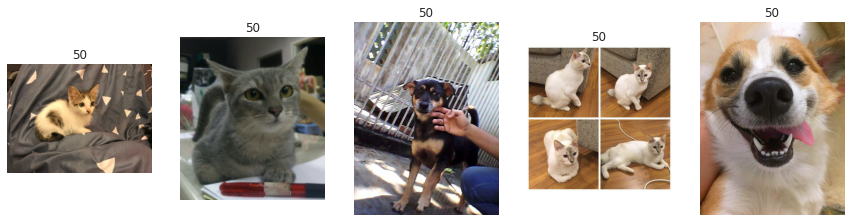

In [23]:
#Input the train_df, and ask for 5 radom images at pawpularity score 10 and random state 1
df = train_df
num_images = 5
desired_pawpularity = 50
random_state = 1
pawpularity_pics(df, num_images, desired_pawpularity, random_state)

### Pawpularity 60

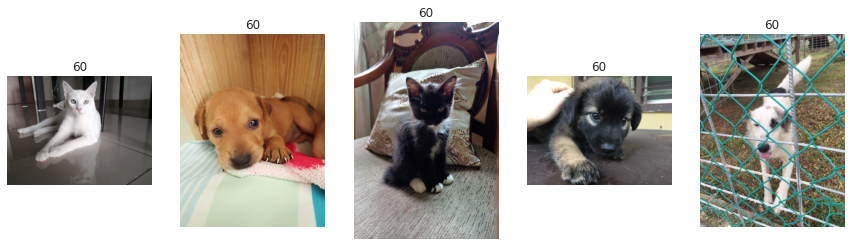

In [24]:
#Input the train_df, and ask for 5 radom images at pawpularity score 10 and random state 1
df = train_df
num_images = 5
desired_pawpularity = 60
random_state = 1
pawpularity_pics(df, num_images, desired_pawpularity, random_state)

### Pawpularity 70

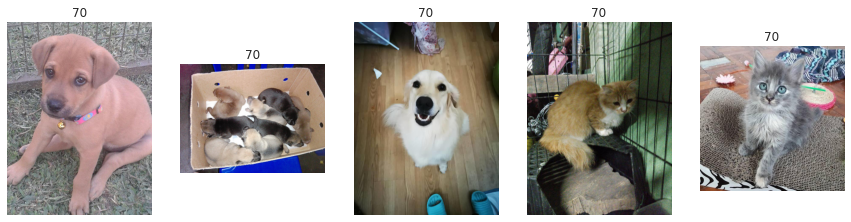

In [25]:
#Input the train_df, and ask for 5 radom images at pawpularity score 10 and random state 1
df = train_df
num_images = 5
desired_pawpularity = 70
random_state = 1
pawpularity_pics(df, num_images, desired_pawpularity, random_state)

### Pawpularity 80

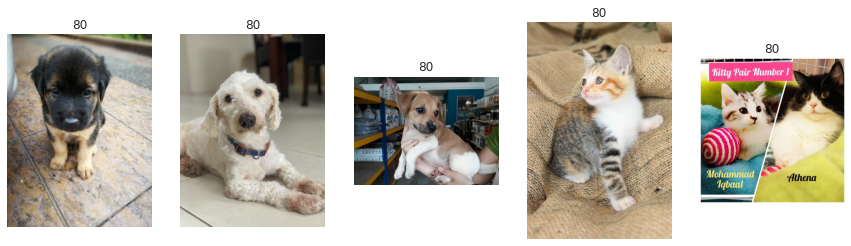

In [26]:
#Input the train_df, and ask for 5 radom images at pawpularity score 10 and random state 1
df = train_df
num_images = 5
desired_pawpularity = 80
random_state = 1
pawpularity_pics(df, num_images, desired_pawpularity, random_state)

### Pawpularity 90

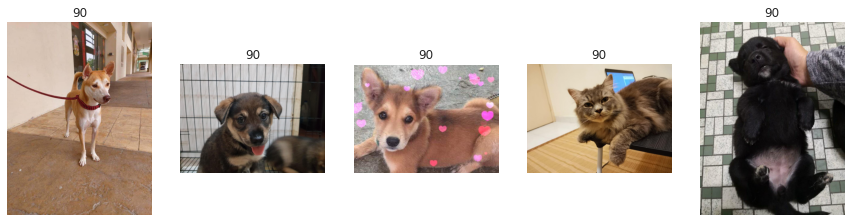

In [27]:
#Input the train_df, and ask for 5 radom images at pawpularity score 10 and random state 1
df = train_df
num_images = 5
desired_pawpularity = 90
random_state = 1
pawpularity_pics(df, num_images, desired_pawpularity, random_state)

### Pawpularity 100

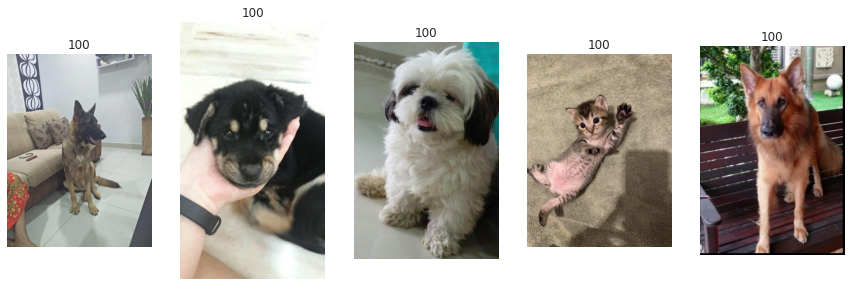

In [28]:
#Input the train_df, and ask for 5 radom images at pawpularity score 10 and random state 1
df = train_df
num_images = 5
desired_pawpularity = 100
random_state = 1
pawpularity_pics(df, num_images, desired_pawpularity, random_state)

We did it! We can now look through the images based on pawpularity scores quickly and easily. Feel free to change up the code in your own notebooks to improve upon this function! For example, you can add error handling or modify it to accept a range of pawpularity scores.

## Step 6: Planning for model building
Now that we've explored the data, it's time to plan for what comes next. Here are my thoughts:
* We saw from the metadata analysis that the features are all very similar to eachother in terms of distribution of pawpularity scores. May be hard for an alogrithm to make use of this effectively.
* I could not accurately predict pawpularity based on these images, which makes me think a machine learning algorithm is also going to have a hard time predicting pawpularity.
* Sometimes, there is a problem that doesn't lend itself easily to machine learning models. This may be one of those cases. 
* It is possible that pawpularity is not based entirely on the pet pictures themselves. Perhaps the website mechanics or outside factors influence which pets are getting clicks and therefore high pawpularity scores.
* Next, we will go forward with regression models using the metadata (.csv data).
* Then, we will apply computer vision techniques and build models using the images themselves. 

### Hope this helped! And hope to see you in Tutorial Part 2: Regression Models for Beginners